In [70]:
from advectionGPdatasets.roundhill import RoundHill
from advectionGPdatasets import proposeboundary
#from advectionGP.models import AdjointAdvectionDiffusionModel as Model
from advectionGP.mfmodels import MeshFreeAdjointAdvectionDiffusionModel as Model
from advectionGP.sensors import FixedSensorModel #Builds sensor arrays to generate data for foward model or to generate observations for comparison
from advectionGP.kernels import EQ #Generates exponentiated quadratic kernel approximation
from advectionGP.wind import WindSimple
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [71]:
rh = RoundHill()
X = rh.experiments[0].X
Y = rh.experiments[0].Y
boundary = proposeboundary(X)
boundary[0][2]=-30 #puts the source on the grid!

In [72]:
boundary

([-60.0, -186.0, -30], [660.0, 68.0, 218.0])

In [73]:
#windvect = [rh.experiments[0].windX,rh.experiments[0].windY]
#print(windvect)

In [74]:
len(X)

351

In [75]:
#import random
#keep = random.sample(range(len(X)),50)
#X = X[keep,:]
#Y = Y[keep]

In [76]:
np.set_printoptions(precision=1,suppress=True)

In [77]:
np.array(boundary[1])-np.array(boundary[0])

array([720., 254., 248.])

(-198.7, 80.7, -42.4, 230.4)

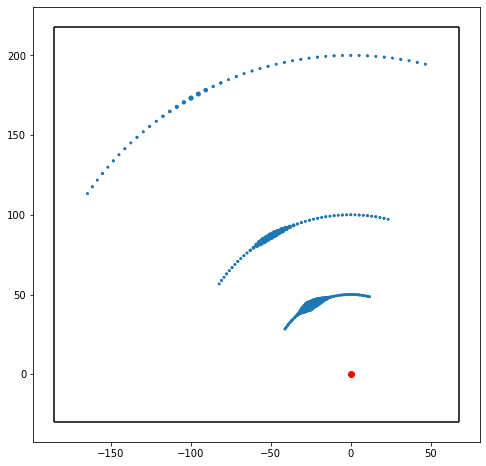

In [78]:
plt.figure(figsize=[8,8])
plt.scatter(X[:,2],X[:,3],3+Y/10)
plt.hlines([boundary[0][2],boundary[1][2]],boundary[0][1],boundary[1][1])
plt.vlines([boundary[0][1],boundary[1][1]],boundary[0][2],boundary[1][2])
plt.plot([0],[0],'or')
plt.axis('equal')

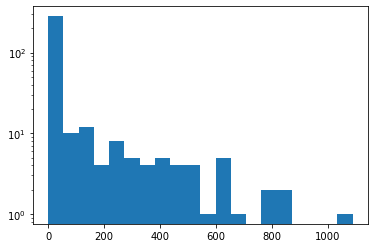

In [79]:
plt.hist(Y,20,log=True);

In [80]:
Y /= np.std(Y)

In [81]:
rh.experiments[0].windX,rh.experiments[0].windY

(-0.9943022826340254, 1.8949836333722694)

In [82]:
#set up our model...
N_feat = 800 #Number of features used to infer the source
k = EQ(20, 1)
res = [400,30,30]
gbs = ((np.prod(res)*len(X)*8)/1024/1024/1000)
print("Memory usage in grid model: %0.2f Gb" % gbs)
assert gbs<6, "TOO BIG :("
noiseSD = 0.1
sensors = FixedSensorModel(X,3)
windmodel=WindSimple(rh.experiments[0].windX,rh.experiments[0].windY)
k_0 = 0.1
mInfer = Model(resolution=res,boundary=boundary,N_feat=N_feat,noiseSD=noiseSD,kernel=k,sensormodel=sensors,windmodel=windmodel,k_0=k_0) #Initiate new model for inference


Memory usage in grid model: 0.96 Gb


In [83]:
#dt: time grid size
#dx: x direction grid size
#dy: y direction grid size
#dx2 = dx**2
#dy2 = dy**2
#Nt: Number of evaluation points in time
#Nx: Number of evaluation points in x axis
#Ny: Number of evaluation points in y axis
mInfer.getGridStepSize()

(1.8,
 8.466666666666667,
 8.266666666666667,
 71.68444444444445,
 68.33777777777779,
 400,
 30,
 30)

In [84]:
mInfer.computeModelRegressors(Nparticles=250) # Compute regressor matrix
meanZ, covZ = mInfer.computeZDistribution(Y) # Infers z vector mean and covariance using regressor matrix
sourceInfer = mInfer.computeSourceFromPhi(meanZ) # Generates estimated source using mean of the inferred distribution
concInfer=mInfer.computeConcentration(sourceInfer) # Generates estimated concentration from inferred source

Initialising particles...
Diffusing particles...


KeyboardInterrupt: 

In [69]:
#sourceInfer = mInfer.computeSourceFromPhi(meanZ) # Generates estimated source using mean of the inferred distribution
#concInfer=mInfer.computeConcentration(sourceInfer) # Generates estimated concentration from inferred source

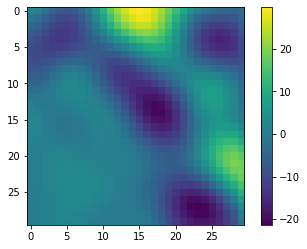

In [17]:
plt.imshow(concInfer[4,:,:])
plt.colorbar()

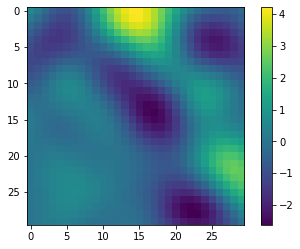

In [18]:
plt.imshow(sourceInfer[4,:,:])
plt.colorbar()

In [19]:
boundary

([-60.0, -186.0, -30], [660.0, 68.0, 218.0])

In [20]:
tgrid = []
ts = np.unique(X[:,1])
for t in np.unique(X[:,1]):
    tgrid.append(mInfer.getGridCoord([t,0,0])[0])
tgrid

[50, 133, 366]

In [32]:
realsource = mInfer.getGridCoord([0,0,0])

In [40]:
Xgrid = mInfer.getGridCoord(X[:,[0,2,3]])

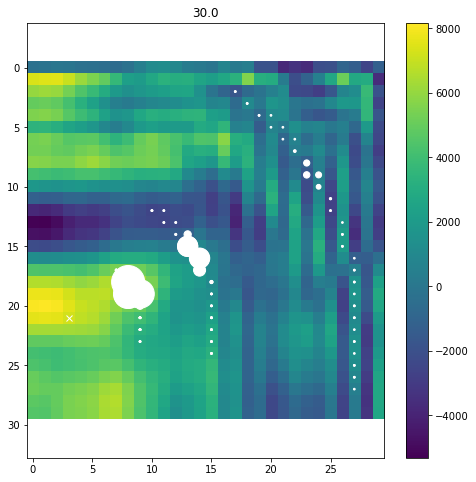

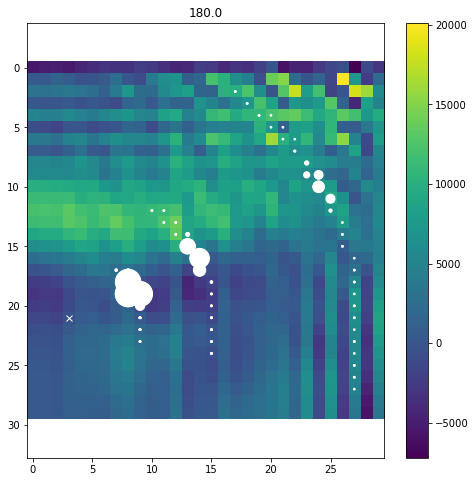

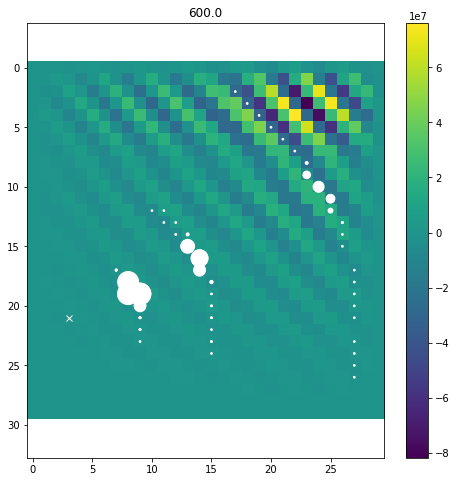

In [18]:


for t,tg in zip(ts,tgrid):#range(5,40,5):
    plt.figure(figsize=[8,8])

    #plt.imshow(sourceInfer[tg,:,:])
    plt.imshow(concInfer[tg,:,:])
    plt.colorbar()
    plt.title(t)
    plt.plot(realsource[2],realsource[1],'xw')
    plt.scatter(Xgrid[X[:,1]==t,2],Xgrid[X[:,1]==t,1],3+Y[X[:,1]==t],color='w')
    plt.axis('equal')

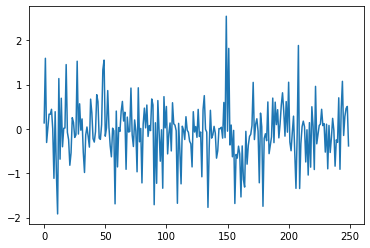

In [33]:
plt.plot(meanZ)

In [34]:
plt.plot(z_samp)

NameError: name 'z_samp' is not defined

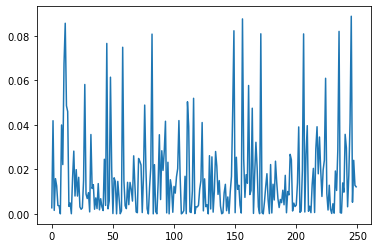

In [35]:
plt.plot(np.diag(covZ))

In [36]:
np.random.multivariate_normal(meanZ,covZ)

array([ 0.1,  1.8, -0.4,  0.1,  0.5,  0.3,  0.4,  0. , -1.2,  0.6, -1.5,
       -1.7,  0.7, -0.2,  0.7, -0.5,  0. ,  0.1,  1.4, -0. , -0.7, -0.9,
       -0.5,  0.2,  0.1, -0.3, -0.1,  1.5, -0.1,  0.7,  0. ,  0.2, -0.5,
       -0.8, -0.4,  0.1, -0.1, -0.4,  0.6,  0.4, -0.1, -0.2,  0. ,  1.1,
        0.5,  0.1, -0.3,  0. ,  0.7,  1.6, -0.1,  0.4,  0.7,  0. , -0.6,
       -0.4, -0. ,  0. , -1.7,  0.7, -1. , -0. ,  0. ,  0.3,  0.7, -0. ,
        0.4, -1.1,  0.1, -0.1, -0.1,  0.8,  0. , -0.3,  0.2, -0.2, -0.4,
        0.6, -0.3,  0. , -1.3,  0. ,  1. ,  0. ,  0.6, -0.1,  0.1, -0.3,
        0.5,  0.5, -1.9,  0.4, -1.1,  0. , -0. , -0.9, -0. , -1.1,  0.9,
        0. ,  0.6, -0.5, -0.1,  0.2, -1. ,  0.8,  0.1,  0.1, -0.1, -1.9,
        0.1, -0.6, -1.6,  0.1, -0. , -0.4, -0. , -0. ,  0. , -0.3, -0.3,
       -1.1,  0.3, -0.4,  0. , -0.3,  0.4, -0.2, -0.1, -1.1,  0.4,  1.1,
       -0.1, -0.2, -1.9, -0.5,  0.3, -0. , -0.1,  0.1, -0.1, -0.7, -0.6,
        0. , -0. ,  0.1, -0.1,  0.5, -0.1,  2.2, -0

In [21]:
source_samples = []
conc_samples=[]    
for z_samp in np.random.multivariate_normal(meanZ, covZ,5):
    s = mInfer.computeSourceFromPhi(z_samp)
    source_samples.append(s)
    conc_samples.append(mInfer.computeConcentration(s))
    
source_samples=np.array(source_samples)
#conc_samples=np.array(conc_samples)

source_lower_ci = np.percentile(source_samples,2.5,0)
source_upper_ci = np.percentile(source_samples,97.5,0)
source_mean = np.percentile(source_samples,50,0)

#conc_lower_ci = np.percentile(conc_samples,2.5,0)
#conc_upper_ci = np.percentile(conc_samples,97.5,0)
#conc_mean = np.percentile(conc_samples,50,0)


(array([    12.,     32.,    116.,    513., 352569.,   6200.,    414.,
           100.,     34.,     10.]),
 array([-3.3e+17, -2.6e+17, -2.0e+17, -1.3e+17, -6.3e+16,  3.9e+15,
         7.1e+16,  1.4e+17,  2.0e+17,  2.7e+17,  3.4e+17]),
 <a list of 10 Patch objects>)

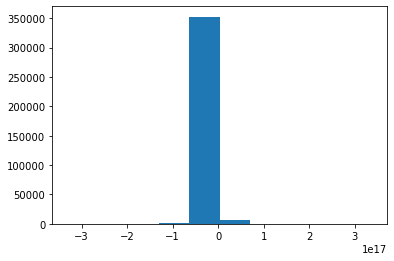

In [22]:
plt.hist(concInfer.flatten())

In [23]:
plt.hist(conc_mean.flatten())

NameError: name 'conc_mean' is not defined

In [24]:
mInfer.resolution

array([400,  30,  30])

(-0.5, 29.5, 29.5, -0.5)

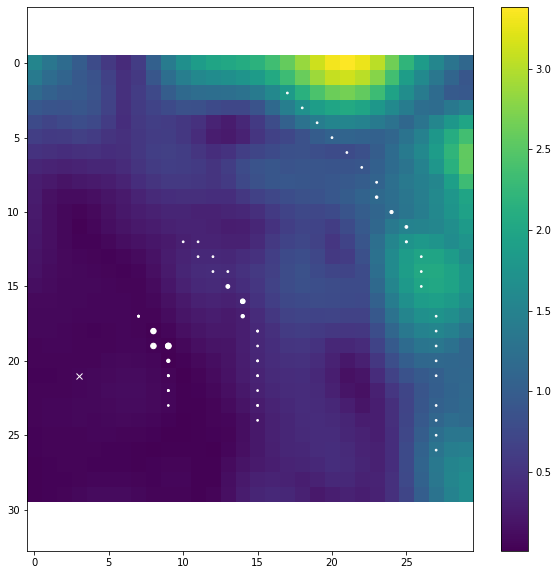

In [46]:
plt.figure(figsize=[10,10])
plt.imshow((source_upper_ci-source_lower_ci)[0,:,:])
plt.colorbar()
plt.plot(realsource[2],realsource[1],'xw')
plt.scatter(Xgrid[X[:,1]==t,2],Xgrid[X[:,1]==t,1],3+Y[X[:,1]==t]*10,color='w')
plt.axis('equal')

In [61]:
timepoint = 0
tg = tgrid[timepoint]
#tg = 0
#conf = (conc_upper_ci-conc_lower_ci)[tg,:,:]
#conc = concInfer[tg,:,:].copy()
#conc[conf>5]=np.NaN

conf = (source_upper_ci-source_lower_ci)[tg,:,:]
source = sourceInfer[tg,:,:].copy()
source[conf>0.5]=np.NaN

(-0.5, 29.5, 29.5, -0.5)

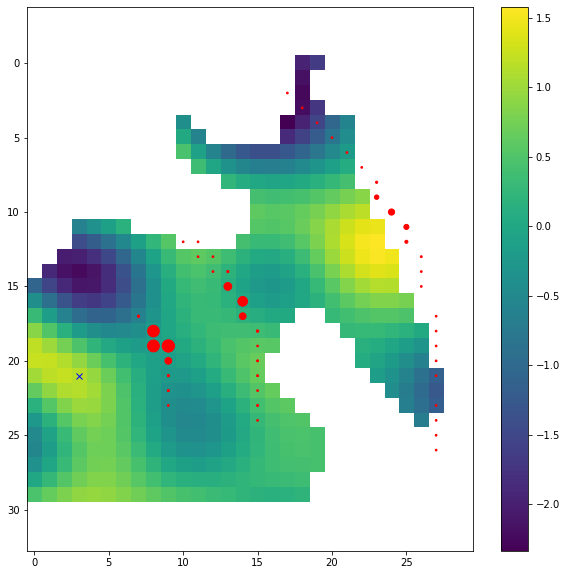

In [64]:
plt.figure(figsize=[10,10])
#plt.imshow(sourceInfer[tgrid[timepoint],:,:],clim=[-1,1.5],alpha=0.3)
plt.imshow(source)#,clim=[-0.5,0.5])#,origin='lower')#,clim=[-1,1.5])
plt.colorbar()
plt.plot(realsource[1],realsource[2],'xw')
#plt.scatter(Xgrid[X[:,1]==ts[timepoint],1],Xgrid[X[:,1]==ts[timepoint],2],3+Y[X[:,1]==ts[timepoint]]/10,color='red')
plt.scatter(Xgrid[X[:,1]==t,2],Xgrid[X[:,1]==t,1],3+Y[X[:,1]==t]*50,color='r')
plt.plot(realsource[2],realsource[1],'xb')
plt.axis('equal')

NameError: name 'conc' is not defined

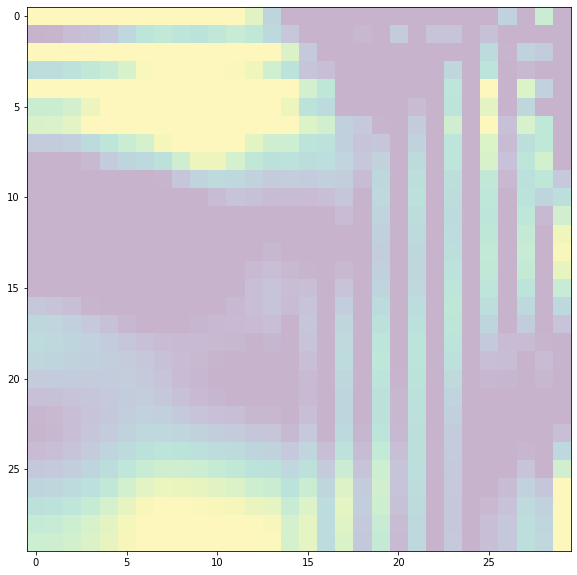

In [29]:
plt.figure(figsize=[10,10])
plt.imshow(concInfer[tgrid[timepoint],:,:],clim=[0,40],alpha=0.3)
plt.imshow(conc,clim=[0,40])
plt.colorbar()
plt.plot(realsource[2],realsource[1],'xw')
plt.scatter(Xgrid[X[:,1]==ts[timepoint],2],Xgrid[X[:,1]==ts[timepoint],1],3+Y[X[:,1]==ts[timepoint]]*20,color='red')
plt.axis('equal')

